In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#read in login data
logins = pd.read_json('source_data/logins.json')

In [3]:
#inspect
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#check if the column is already datetimes
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#check what the time period covered is
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [6]:
#setup column for counting
logins['logs']=1
logins.head()

,login_time,logs
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
#set datetime as index
logins.set_index('login_time', inplace=True, drop=True)
logins.head()

,logs
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
#resample to 15 mins
logins_rs = logins.resample('15min').sum()
logins_rs.head()

,logs
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
logins_rs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   logs    9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
logins_rs.describe()

,logs
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


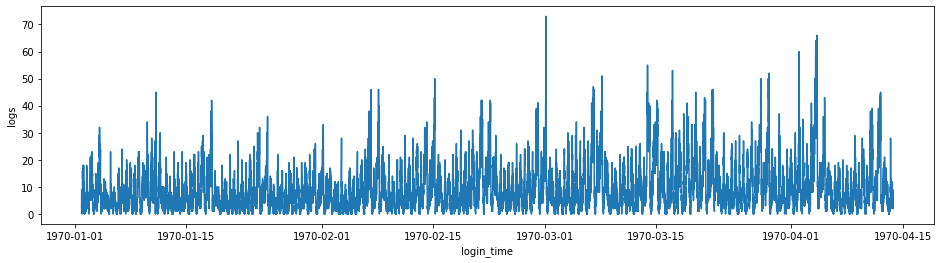

In [11]:
#visualize data
plt.figure(figsize=(16,4))
sns.lineplot(data=logins_rs, x='login_time', y='logs')
plt.show()

In [12]:
#Create daily average column to remove seasonality
logins_rs['daily_average'] = logins_rs.resample('1d').mean()
logins_rs.head(25)

,logs,daily_average
login_time,,
1970-01-01 20:00:00,2,NaN
1970-01-01 20:15:00,6,NaN
1970-01-01 20:30:00,9,NaN
1970-01-01 20:45:00,7,NaN
1970-01-01 21:00:00,1,NaN
1970-01-01 21:15:00,4,NaN
1970-01-01 21:30:00,0,NaN
1970-01-01 21:45:00,4,NaN
1970-01-01 22:00:00,9,NaN


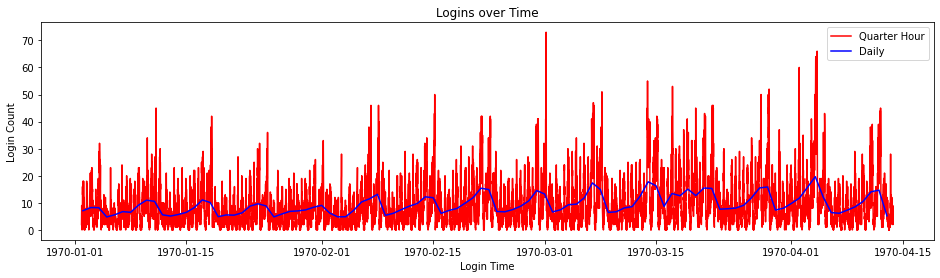

In [13]:
#plot daily average logs over log counts 
plt.figure(figsize=(16,4))
sns.lineplot(data=logins_rs, x='login_time', y='logs', color='r', label='Quarter Hour')
sns.lineplot(data=logins_rs, x='login_time', y='daily_average',color='b',label='Daily')
plt.ylabel('Login Count')
plt.xlabel('Login Time')
plt.title('Logins over Time')
plt.show()

In [14]:
#add column for 7 day average
logins_rs['7day'] = logins.resample('7D').mean()
logins_rs['hourly_average'] = logins.resample('H').mean()
logins_rs['7day'] = logins_rs.resample('7D').mean()
logins_rs['hourly_average'] = logins_rs.resample('H').mean()

In [15]:
#add columns for time components month, day of month, day of year, week of year, day of week, hour of day
logins_rs['month'] = logins_rs.index.month
logins_rs['day_M'] = logins_rs.index.day
logins_rs['day_Y'] = logins_rs.index.dayofyear
logins_rs['week'] = logins_rs.index.week
logins_rs['dow'] = logins_rs.index.dayofweek
logins_rs['hour'] = logins_rs.index.hour
logins_rs.head(25)

<ipython-input-15-ddef6d5e2478>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  logins_rs['week'] = logins_rs.index.week


,logs,daily_average,7day,hourly_average,month,day_M,day_Y,week,dow,hour
login_time,,,,,,,,,,
1970-01-01 20:00:00,2,NaN,NaN,6.00,1,1,1,1,3,20
1970-01-01 20:15:00,6,NaN,NaN,NaN,1,1,1,1,3,20
1970-01-01 20:30:00,9,NaN,NaN,NaN,1,1,1,1,3,20
1970-01-01 20:45:00,7,NaN,NaN,NaN,1,1,1,1,3,20
1970-01-01 21:00:00,1,NaN,NaN,2.25,1,1,1,1,3,21
1970-01-01 21:15:00,4,NaN,NaN,NaN,1,1,1,1,3,21
1970-01-01 21:30:00,0,NaN,NaN,NaN,1,1,1,1,3,21
1970-01-01 21:45:00,4,NaN,NaN,NaN,1,1,1,1,3,21
1970-01-01 22:00:00,9,NaN,NaN,5.25,1,1,1,1,3,22


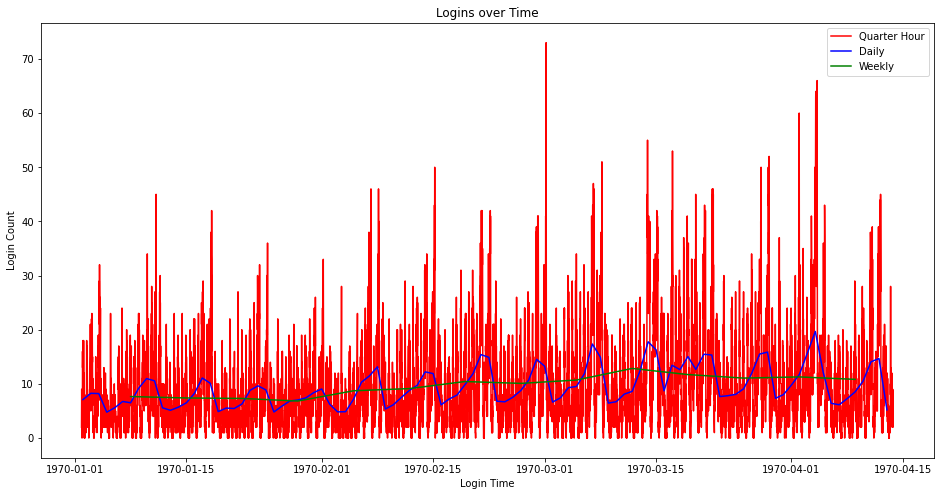

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(data=logins_rs, x='login_time', y='logs', color='r', label='Quarter Hour')
sns.lineplot(data=logins_rs, x='login_time', y='daily_average',color='b', label='Daily')
sns.lineplot(data=logins_rs, x='login_time', y='7day',color='g', label='Weekly')
plt.ylabel('Login Count')
plt.xlabel('Login Time')
plt.title('Logins over Time')
plt.show()

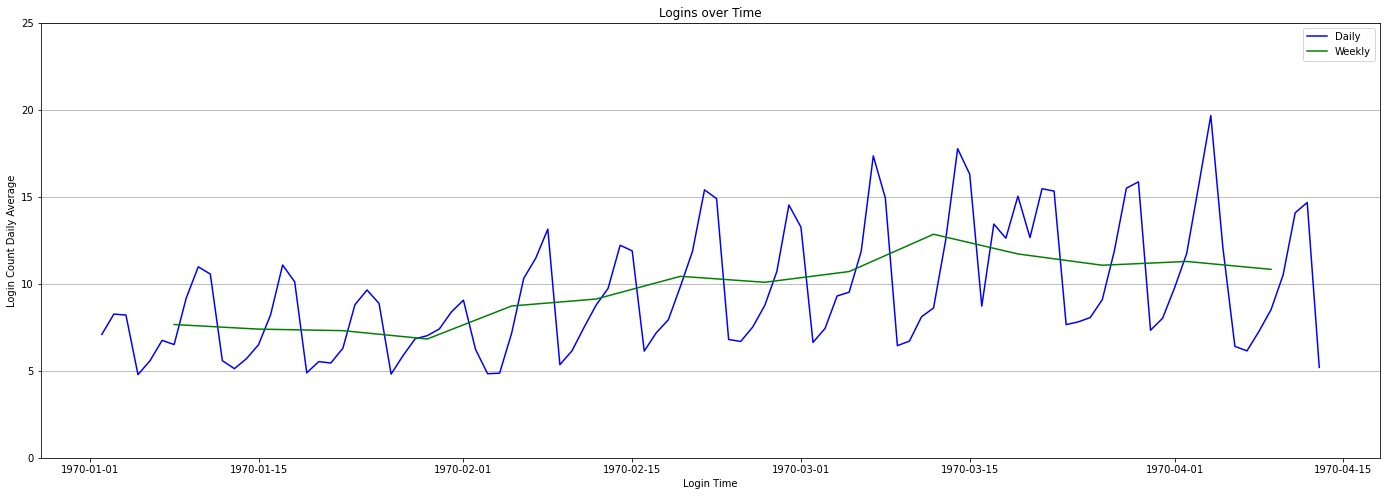

In [17]:
#LEt's take a closer look at the daily and weekly averages
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='login_time', y='daily_average',color='b', label='Daily')
sns.lineplot(data=logins_rs, x='login_time', y='7day',color='g', label='Weekly')
plt.ylim((0,25))
plt.grid(axis='y')
plt.ylabel('Login Count Daily Average')
plt.xlabel('Login Time')
plt.title('Logins over Time')
plt.show()

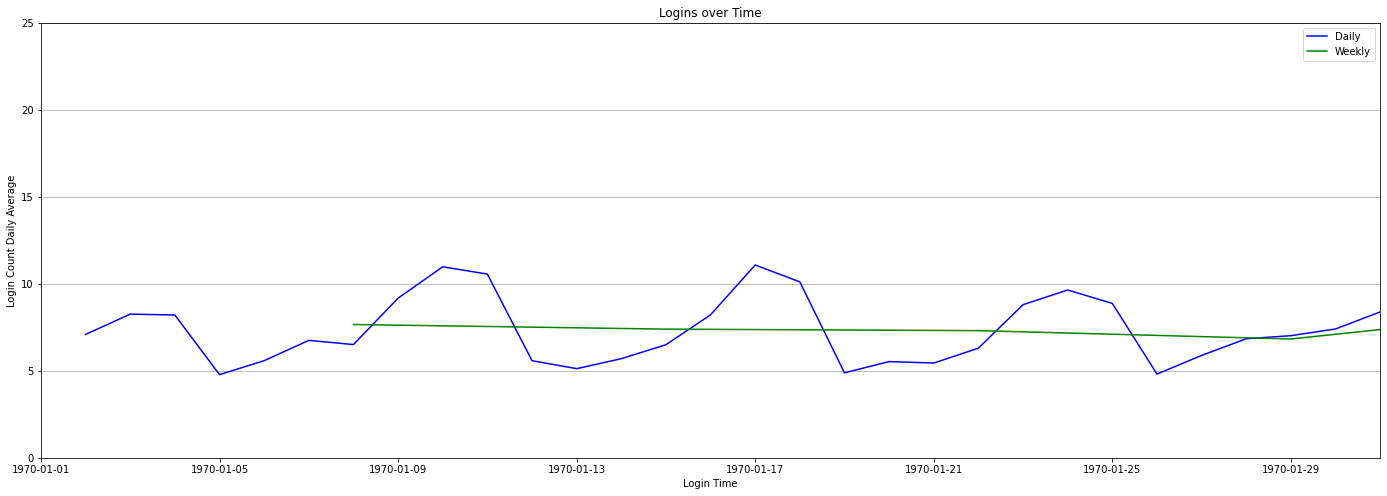

In [18]:
#A closer look at the month of January
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='login_time', y='daily_average',color='b', label='Daily')
sns.lineplot(data=logins_rs, x='login_time', y='7day',color='g', label='Weekly')
plt.ylim((0,25))
plt.xlim( (pd.Timestamp('1970-01-01'), pd.Timestamp('1970-01-31')) )
plt.grid(axis='y')
plt.ylabel('Login Count Daily Average')
plt.xlabel('Login Time')
plt.title('Logins over Time')
plt.show()

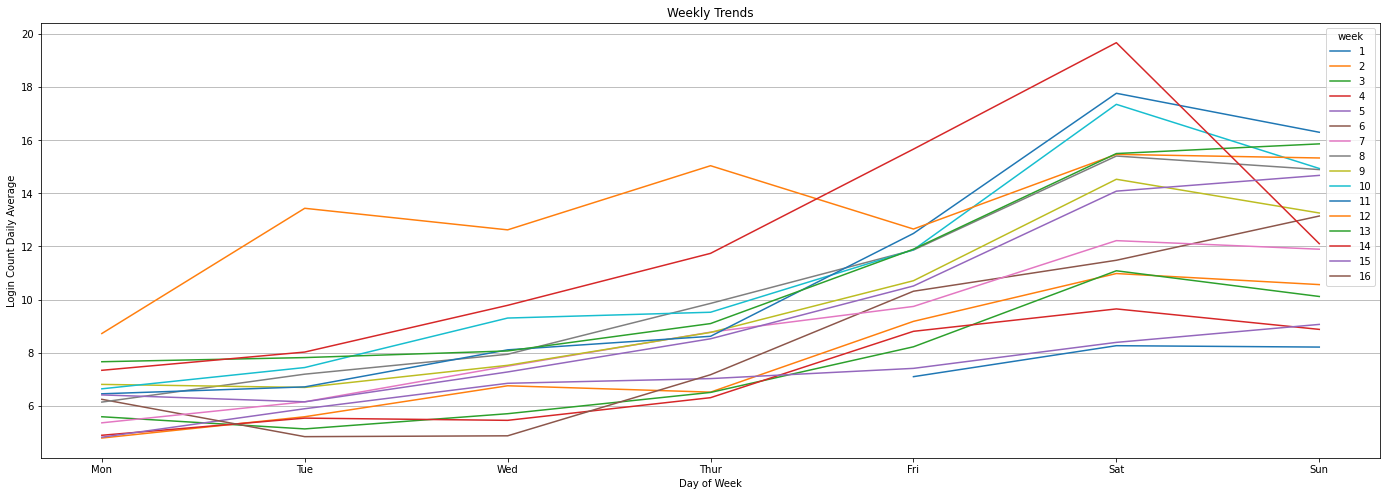

In [19]:
#looking at weekly trend by day for each month of the year
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='dow', y='daily_average',color='b', hue='week', palette='tab10')
plt.xticks([0, 1, 2, 3, 4, 5, 6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.grid(axis='y')
plt.ylabel('Login Count Daily Average')
plt.xlabel('Day of Week')
plt.title('Weekly Trends')
plt.show()

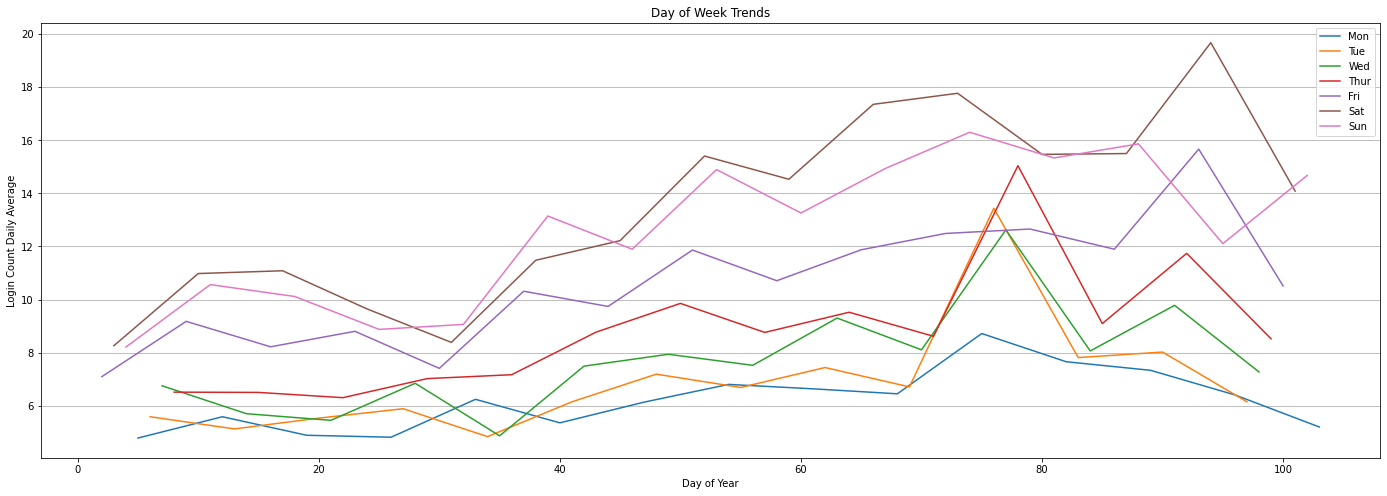

In [20]:
#plotting trend by day over course of the data collected
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='day_Y', y='daily_average',color='b', hue='dow', palette='tab10')
plt.grid(axis='y')
plt.ylabel('Login Count Daily Average')
plt.xlabel('Day of Year')
plt.title('Day of Week Trends')
plt.legend(labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.show()

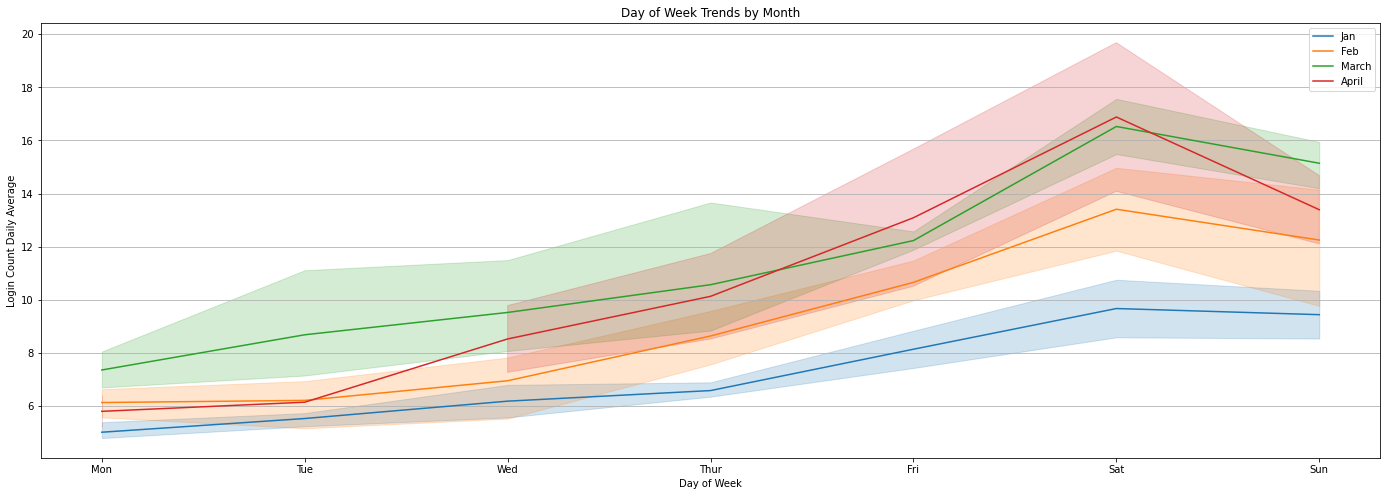

In [21]:
#plotting day of week average for each month seperately
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='dow', y='daily_average',color='b', hue='month', palette='tab10')
plt.legend(labels=['Jan', 'Feb', 'March', 'April'])
plt.grid(axis='y')
plt.ylabel('Login Count Daily Average')
plt.xlabel('Day of Week')
plt.title('Day of Week Trends by Month')
plt.xticks([0, 1, 2, 3, 4, 5, 6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.show()

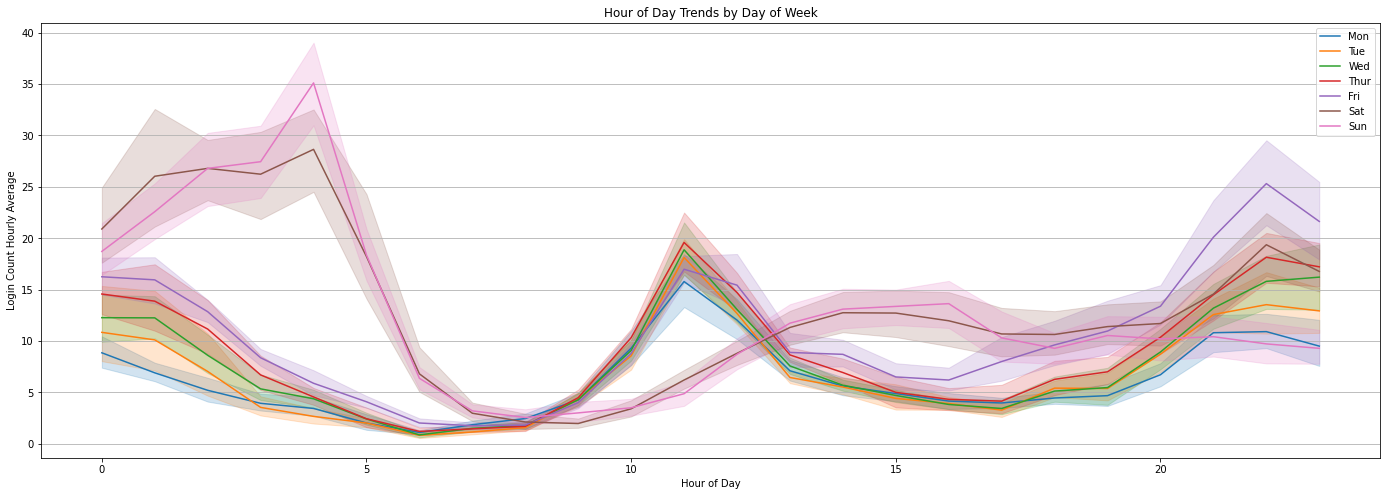

In [22]:
#Plotting hourly averages for each day of the week, including 95% confidence interval
plt.figure(figsize=(24,8))
sns.lineplot(data=logins_rs, x='hour', y='hourly_average',color='b', hue='dow', palette='tab10')
plt.legend(labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.grid(axis='y')
plt.ylabel('Login Count Hourly Average')
plt.xlabel('Hour of Day')
plt.title('Hour of Day Trends by Day of Week')
plt.show()

In [23]:
logins_rs.loc[~logins_rs['daily_average'].isnull(),'daily_average']

login_time
1970-01-02     7.093750
1970-01-03     8.260417
1970-01-04     8.208333
1970-01-05     4.781250
1970-01-06     5.583333
                ...    
1970-04-09     8.520833
1970-04-10    10.510417
1970-04-11    14.083333
1970-04-12    14.677083
1970-04-13     5.197368
Freq: 1440T, Name: daily_average, Length: 102, dtype: float64

In [24]:
logins_rs.loc[~logins_rs['7day'].isnull(), '7day']

login_time
1970-01-08     7.662202
1970-01-15     7.397321
1970-01-22     7.309524
1970-01-29     6.830357
1970-02-05     8.727679
1970-02-12     9.126488
1970-02-19    10.433036
1970-02-26    10.090774
1970-03-05    10.706845
1970-03-12    12.851190
1970-03-19    11.718750
1970-03-26    11.069940
1970-04-02    11.287202
1970-04-09    10.832609
Freq: 10080T, Name: 7day, dtype: float64

### Summary
The login data has a daily and weekly seasonality. However after controlling for the that we are able to find an upward tend in the month over month data with an increase from a weekly average of 7.66 at the startof the data to a weekly average of 10.83 at the end. 

The weekly seasonality shows a considerable that logins increase over the course slowly from Monday to Wednesday and then more rapidly from Thursday to Saturday. A slight dropoff is seen from Saturday to Sunday, but Sunday is still the second most popular day for logins.

There are seperate daily seasonalities for weekdays and weekends. During the weekdays logins are low at the start of the work day (6-7am) and increase dramatically around lunchtime before falling sharply back to worktime levels after 6pm, roughly dinnertime. The logins increase until about midnight before tapering off, assuming people going to sleep. 

During weekends logins saty relatively low throughout the morning, gradually increasing from lunchtime until midafternoon. They plateau during dinnertime and drastically increase from dinnertime until about 3am when the crash sharply back down.

Note that both January and April have incomplete data for the respective months. This should be noted to not have concern over the dip at the April tail of the data as it is incomplete.